In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def parametric_conv(a,b):
  #converting points in image space to points in parametric space
  #r=acos(x)+bsin(x)
  #substituting a and b in the above equation
  x = np.linspace(-5,5,100)
  s=a*np.cos(x)
  f=b*np.sin(x)
  return s+f
def plot_imagespace(a,b):
  #b=ma+c
  #substituting a nd b in above equation to get value of c
  m = np.linspace(-5,5,100)
  c=b-(m*a)

  return c
def plot_houghspace(a,b):
  #getting values for hough space
  x=np.linspace(-5,5,100)
  r=parametric_conv(a,b)
  return r

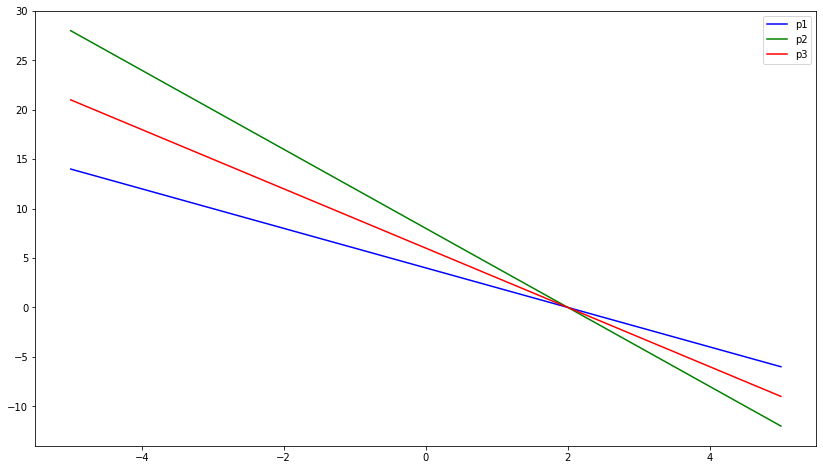

In [13]:
p1=plot_imagespace(2,4)
p2=plot_imagespace(4,8)
p3=plot_imagespace(3,6)
h1=plot_houghspace(2,4)
h2=plot_houghspace(4,8)
h3=plot_houghspace(3,6)
fig1 = plt.figure(figsize = (14, 8))
#plotting lines in image space
x = np.linspace(-5,5,100)
#y = np.cos(x)
plt.plot(x, p1, 'b', label ='p1')
plt.plot(x, p2, 'g', label ='p2')
plt.plot(x, p3, 'r', label ='p3')
plt.legend()
plt.show()


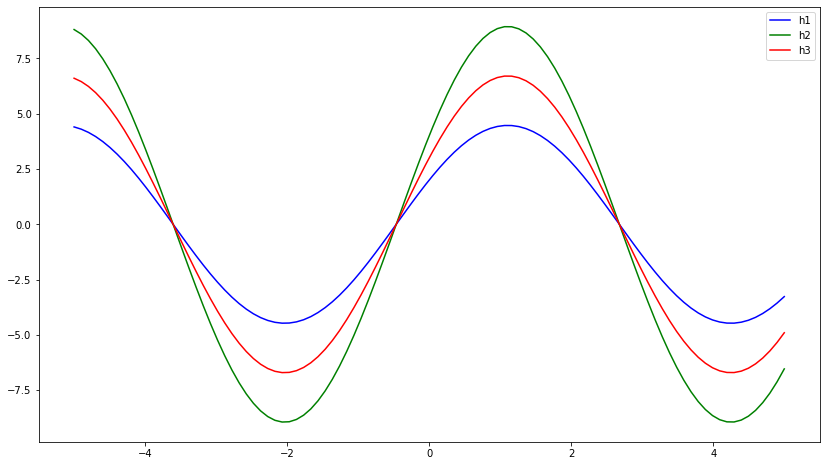

In [14]:
fig2 = plt.figure(figsize = (14, 8))
#plotting points in parametric space
x = np.linspace(-5,5,100)
plt.plot(x, h1, 'b', label ='h1')
plt.plot(x, h2, 'g', label ='h2')
plt.plot(x, h3, 'r', label ='h3')
plt.legend()
plt.show()

In [23]:
import cv2
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread("/content/drive/MyDrive/cherry.jpg", -1)
from google.colab.patches import cv2_imshow




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
img1 = cv2.imread("/content/drive/MyDrive/download.jfif", -1)
img2=img1
#using builtin hough transform

In [21]:
#converting to gray scale
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#using canny edge detection for detecting edges
edges = cv2.Canny(gray,50,150,apertureSize = 3)
#detecting lines in image
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,100,10)
for x1,y1,x2,y2 in lines[0]:
  #for drawing lines on image
    cv2.line(img1,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img1)

True

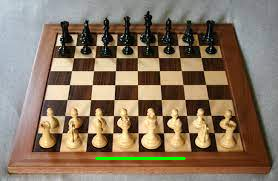

In [22]:
cv2_imshow(img1)

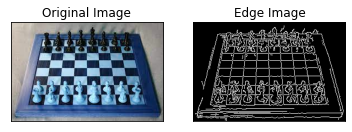

In [25]:
edges = cv2.Canny(img2,100,200)
#this is the edges image which would be used in accumulator matrix
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

181 278 331


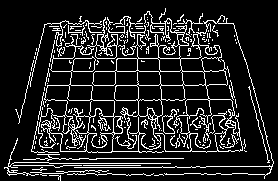

In [39]:
rows=edges.shape[0]
cols=edges.shape[1]
max_radius=pow(rows,2)+pow(cols,2)
max_radius=int(np.sqrt(max_radius))

print(rows,cols,max_radius)
cv2_imshow(edges)

In [47]:
theta_range=np.deg2rad(np.arange(0, 360))
#initializing theta array for the range of tehta and radius for maxiumum range of radius we may obtain
radius_range= np.linspace(-max_radius, -max_radius, max_radius)
#creating 2d arrays of ro as rows and theta as columns
acc=np.zeros((max_radius*2,len(theta_range*theta_range)))


In [48]:
for x in (range(rows)):
  for y in (range(cols)):
    #traversing rows and columns of the image
    print(edges[x,y])
    if edges[x,y]>0:
      #if the pixel is high intensity
      for theta in range(len(theta_range)):
        #for every theta, find out the image point in parametric space detecting the number of lines intersecting at a point
        r = x*np.cos(theta_range[theta]) + y * np.sin(theta_range[theta])
        acc[int(r) + max_radius,theta] += 1


Streaming output truncated to the last 5000 lines.
0
0
0
0
255
255
0
0
255
255
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
255
0
0
0
0
0
0
0
0
0
0
0
0
255
0
0
255
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

<Figure size 432x288 with 0 Axes>

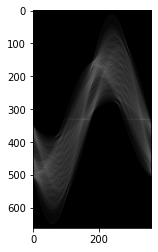

In [49]:
plt.set_cmap('gray')
plt.figure('Hough Space')
plt.imshow(acc)
plt.set_cmap('gray')
plt.show()

In [57]:
print(max(map(max, acc)))
#finding max value in teh accumulator matrix


171.0
